### Module 6A
### This notebook reads and displays information from a cell shape model

In [1]:
import h5py
import numpy as np
#import scipy
#import mat73
import matplotlib.pyplot as plt

### There are two different versions of .mat files. Older .mat files (<v7.3) and newer .mat files (>v7.3). They require different readersin python.
### Use h5py or mat73 reader for newer .mat files and scipy.io reader for older .mat files

In [2]:
## use mat73
#load in mat file - => v7.3
# use mat73
#data_dict = mat73.loadmat('xxx.mat')
#data_dict

In [3]:
## or use h5py
f = h5py.File('/home/murphylab/cellorganizer/local/models/HeLa9cellsA.mat', 'r')

### examine the structure of the model

In [4]:
list(f.keys())

['#refs#', 'model']

In [5]:
model = f['model']
list(model.keys())

['cellShapeModel',
 'dataset',
 'dimensionality',
 'documentation',
 'filename',
 'id',
 'name',
 'nuclearShapeModel']

In [6]:
cellShapeModel = model['cellShapeModel']
list(cellShapeModel.keys())

['X',
 'all_centers',
 'all_spharm_descriptors',
 'cell_params',
 'cell_params_fname',
 'class',
 'coeff',
 'components',
 'explained',
 'hausdorff_distances',
 'id',
 'latent',
 'latent_dim',
 'max_deg',
 'mu',
 'name',
 'nuc_params',
 'numimgs',
 'options',
 'resolution',
 'rpdm_model_type',
 'scales',
 'score',
 'shape_model_type',
 'train_coeff',
 'train_explained',
 'train_score',
 'tsquared',
 'type',
 'version']

In [7]:
#load in mat file - < v7.3
#data_dict = scipy.io('')

### first consider the object shape parameterizations

In [8]:
# this holds the full spherical harmonic descriptors for each object
cellShapeModel['X']

<HDF5 dataset "X": shape (12276, 8), type "<f8">

In [9]:
# this holds the PCA reduced descriptors for each object (first n PCs)
cellShapeModel['train_score']

<HDF5 dataset "train_score": shape (7, 8), type "<f8">

In [10]:
# this holds the mean coefficients
cellShapeModel['mu']

<HDF5 dataset "mu": shape (12276, 1), type "<f8">

In [11]:
# this holds the coefficients for reconstructing the full descriptors from the reduced descriptors
cellShapeModel['train_coeff']

<HDF5 dataset "train_coeff": shape (7, 12276), type "<f8">

In [12]:
# calculate the full descriptors for the first object
train_score = cellShapeModel['train_score']
train_coeff = cellShapeModel['train_coeff']
mud = cellShapeModel['mu']
print(mud.shape)
# extract the array from the dataset
mu = mud[:,0]
print(mu.shape)
obj1reduced = train_score[:,0]
print(obj1reduced.shape)
obj1full = np.matmul(obj1reduced,train_coeff) + mu
print(obj1full.shape)
print(obj1full[0])

(12276, 1)
(12276,)
(7,)
(12276,)
-0.016767654602419798


### now look at object sizes

<HDF5 dataset "scales": shape (1, 8), type "<f8">


Text(0.5, 1.0, 'Object sizes')

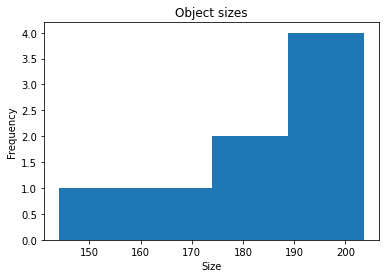

In [13]:
sc = cellShapeModel['scales']
print(sc)
scales = sc[0,:]

plt.hist(x=scales, bins='auto')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Object sizes')

In [14]:
f.close()